Main topics:
    - Role of Government
    - Social Networks 
    - Social Inequality 
    - Family & Changing Gender Roles 
    - Work Orientation 
    - Religion
    - Environment 
    - National Identity  
    - Citizenship 
    - Leisure Time and Sports
    - Health and Health Care


There is a section for RESERVE CODES AND MISSING VALUES (Page 42)


Maybe we can do something like factors that influence happiness levels? health, age, education level, income level...these are also all from 2022 I believe


Research Question:

**"How does satisfaction and confidence levels in the United States healthcare system affect opinions on the role of government in healthcare?"**

Relevant Variables:
- HLTHINF
    - (How much do you agree or disagree with the following statements?) In general, the health care system in the United States is inefficient.
        - 1: strongly agree
        - 2: agree
        - 3: neither agree nor disagree
        - 4: disagree
        - 5: strongly disagree
        - D: can't choose
        - N: no answer
        - I: not applicable
        - S: skipped on web
- HLTHGOV 
    - (How much do you agree or disagree with the following statements?) The government should provide only limited health care services.
        - 1: strongly agree
        - 2: agree
        - 3: neither agree nor disagree
        - 4: disagree
        - 5: strongly disagree
        - D: can't choose
        - N: no answer
        - I: not applicable
        - S: skipped on web
- HLTHTAX 
    - How willing would you be to pay higher taxes to improve the level of health care for all people in the United States? Would you be...
        - 1: very willing
        - 2: fairly willing
        - 3: neither willing nor unwilling
        - 4: fairly unwilling
        - 5: very unwilling
        - D: can't choose
        - N: no answer
        - I: not applicable
        - S: skipped on web
- HLTHSAT
    -  In general, how satisfied or dissatisfied are you with the health care system in the United States? Are you...
        - 1: completely satisfied
        - 2: very satisfied
        - 3: fairly satisfied
        - 4: neither satisfied nor dissatisfied
        - 5: fairly dissatisfied
        - 6: very dissatisfied
        - 7: completely dissatisfied
        - D: can't choose
        - N: no answer
        - I: not applicable
        - S: skipped on web
- CONHLTH
    - In general, how much confidence do you have in the health care system in the United States?
        - 1: complete confidence
        - 2: a great deal of confidence
        - 3: some confidence
        - 4: very little confidence
        - 5: no confidence at all
        - D: can't choose
        - I: not applicable
        - S: skipped on web

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# selecting variables of interest and saving them to a workable csv

var_list = ['year', 'id','hlthinf', 'hlthgov', 'hlthtax', 'hlthsat', 'conhlth'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [3]:
df = pd.read_csv('./selected_gss_data.csv')
display(df.describe())
print(df.shape)
print(f'missing: {df.isnull().sum().sum()}')

,year,id,hlthinf,hlthgov,hlthtax,hlthsat,conhlth
count,72392,72392,1122,1098,1111,1125,1149
unique,35,4511,6,6,6,8,6
top,2006,1,agree,disagree,fairly willing,fairly satisfied,3.0
freq,4510,34,415,417,345,421,544


(72392, 7)
missing: 356355


In [4]:
# cleaning year
year = df['year']
year.unique()

# changing year to numeric values
year = year.replace('year', 0)
year = pd.to_numeric(year, errors='coerce')
df['year'] = year

In [5]:
# cleaning id
id = df['id']
id.unique()

# changing id to numeric values
id = id.replace('id', 0)
id = pd.to_numeric(id, errors='coerce')
df['id'] = id

In [6]:
# cleaning inf
inf = df['hlthinf']
inf.unique()

# coding inf data as numeric
inf = inf.fillna(0)
inf = inf.replace({'hlthinf': 0, 'strongly agree': 1, 'agree': 2, 'neither agree nor disagree': 3, 'disagree': 4, 'strongly disagree': 5})
df['hlthinf'] = inf

C:\Users\rdinh\AppData\Local\Temp\ipykernel_41024\3900898901.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  inf = inf.replace({'hlthinf': 0, 'strongly agree': 1, 'agree': 2, 'neither agree nor disagree': 3, 'disagree': 4, 'strongly disagree': 5})


In [7]:
# cleaning gov
gov = df['hlthgov']
gov.unique()

# coding gov data as numeric
gov = gov.fillna(0)
gov = gov.replace({'hlthgov': 0, 'strongly agree': 1, 'agree': 2, 'neither agree nor disagree': 3, 'disagree': 4, 'strongly disagree': 5})
df['hlthgov'] = gov

C:\Users\rdinh\AppData\Local\Temp\ipykernel_41024\303522073.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gov = gov.replace({'hlthgov': 0, 'strongly agree': 1, 'agree': 2, 'neither agree nor disagree': 3, 'disagree': 4, 'strongly disagree': 5})


In [8]:
# cleaning tax
tax = df['hlthtax']
tax.unique()

# coding tax data as numeric
tax = tax.fillna(0)
tax = tax.replace({'hlthtax': 0, 'very willing': 1, 'fairly willing': 2, 'neither willing nor unwilling': 3, 'fairly unwilling': 4, 'very unwilling': 5})
tax = pd.to_numeric(tax, errors='coerce')
df['hlthtax'] = tax

C:\Users\rdinh\AppData\Local\Temp\ipykernel_41024\3770956827.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tax = tax.replace({'hlthtax': 0, 'very willing': 1, 'fairly willing': 2, 'neither willing nor unwilling': 3, 'fairly unwilling': 4, 'very unwilling': 5})


In [9]:
# cleaning sat
sat = df['hlthsat']
sat.unique()

# coding sat data as numeric
sat = sat.fillna(0)
sat = sat.replace({'hlthsat': 0, 'completely satisfied': 1, 'very satisfied': 2, 'fairly satisfied': 3, 'neither satisfied nor dissatisfied': 4, 'fairly dissatisfied': 5, 'very dissatisfied': 6, 'completely dissatisfied': 7})
sat = pd.to_numeric(sat, errors='coerce')
df['hlthsat'] = sat

C:\Users\rdinh\AppData\Local\Temp\ipykernel_41024\138029251.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sat = sat.replace({'hlthsat': 0, 'completely satisfied': 1, 'very satisfied': 2, 'fairly satisfied': 3, 'neither satisfied nor dissatisfied': 4, 'fairly dissatisfied': 5, 'very dissatisfied': 6, 'completely dissatisfied': 7})


In [10]:
# cleaning con
con = df['conhlth']
con.unique()

# coding con data as numeric
con = con.fillna(0)
con = con.replace('conhlth', 0)
con = pd.to_numeric(con, errors='coerce')
df['conhlth'] = con

In [11]:
# checking cleaned dataset
display(df.describe())
print(f'missing: {df.isnull().sum().sum()}')
df.head()

,year,id,hlthinf,hlthgov,hlthtax,hlthsat,conhlth
count,72392.000000,72392.000000,72392.000000,72392.000000,72392.000000,72392.000000,72392.000000
mean,1997.660349,1241.762087,0.036869,0.055559,0.045350,0.056968,0.048417
std,18.400034,912.283992,0.323771,0.468401,0.400234,0.488390,0.400185
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1985.000000,534.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,1083.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,1722.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,4510.000000,5.000000,5.000000,5.000000,7.000000,5.000000


missing: 0


,year,id,hlthinf,hlthgov,hlthtax,hlthsat,conhlth
0,1972,1,0,0,0,0,0.0
1,1972,2,0,0,0,0,0.0
2,1972,3,0,0,0,0,0.0
3,1972,4,0,0,0,0,0.0
4,1972,5,0,0,0,0,0.0


In [12]:
# limiting to rows where we have meaningful values in all columns
total_df = df.loc[(df['hlthinf'] > 0) & (df['hlthgov'] > 0) & (df['hlthtax'] > 0) & (df['hlthsat'] > 0) & (df['conhlth'] > 0)]
print(total_df.shape)
display(total_df.describe())
total_df.head()

(1008, 7)


,year,id,hlthinf,hlthgov,hlthtax,hlthsat,conhlth
count,1008.0,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,2022.0,1720.346230,2.366071,3.678571,2.925595,3.708333,3.072421
std,0.0,1008.190271,1.077862,1.093384,1.342684,1.446926,0.935727
min,2022.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2022.0,836.500000,2.000000,3.000000,2.000000,3.000000,3.000000
50%,2022.0,1684.500000,2.000000,4.000000,3.000000,3.000000,3.000000
75%,2022.0,2588.250000,3.000000,4.250000,4.000000,5.000000,4.000000
max,2022.0,3544.000000,5.000000,5.000000,5.000000,7.000000,5.000000


,year,id,hlthinf,hlthgov,hlthtax,hlthsat,conhlth
68848,2022,1,2,5,2,3,3.0
68850,2022,3,4,2,4,3,4.0
68852,2022,5,2,5,5,5,4.0
68853,2022,6,1,5,2,4,5.0
68854,2022,7,3,4,2,3,3.0


Section might not be needed for conhlth vs hlthinf, from my understandiing we would want to be anayzing the relationships of HLTHINF, HLTHSAT, CONHLTH vs HLTHGOV or HLTHTAX  - rd

conhlth,1.0,2.0,3.0,4.0,5.0
hlthinf,,,,,
1,7,17,77,83,48
2,17,45,219,82,18
3,2,75,113,25,4
4,15,54,63,9,5
5,2,10,9,7,2


'\n'

conhlth,1.0,2.0,3.0,4.0,5.0
hlthinf,,,,,
1,0.006944,0.016865,0.076389,0.082341,0.047619
2,0.016865,0.044643,0.217262,0.081349,0.017857
3,0.001984,0.074405,0.112103,0.024802,0.003968
4,0.014881,0.053571,0.062500,0.008929,0.004960
5,0.001984,0.009921,0.008929,0.006944,0.001984


'\n'

conhlth                                             
          count      mean       std  min  25%  50%  75%  max
hlthinf                                                     
1         232.0  3.637931  0.988212  1.0  3.0  4.0  4.0  5.0
2         381.0  3.102362  0.831941  1.0  3.0  3.0  4.0  5.0
3         219.0  2.789954  0.724214  1.0  2.0  3.0  3.0  5.0
4         146.0  2.554795  0.886923  1.0  2.0  3.0  3.0  5.0
5          30.0  2.900000  1.061879  1.0  2.0  3.0  4.0  5.0

<Axes: xlabel='hlthinf', ylabel='Density'>

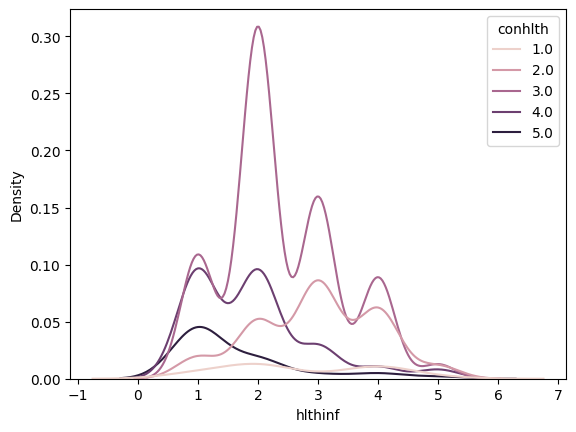

In [13]:
# display(pd.crosstab(total_df['conhlth'], total_df['hlthinf']), '\n')
# display(pd.crosstab(total_df['conhlth'], total_df['hlthinf'], normalize='all'), '\n')
# display(total_df.loc[:,['conhlth', 'hlthinf']].groupby('hlthinf').describe())
# sns.kdeplot(data=total_df, x='conhlth', hue='hlthinf')
display(pd.crosstab(total_df['hlthinf'], total_df['conhlth']), '\n')
display(pd.crosstab(total_df['hlthinf'], total_df['conhlth'], normalize='all'), '\n')
display(total_df.loc[:,['hlthinf', 'conhlth']].groupby('hlthinf').describe())
sns.kdeplot(data=total_df, x='hlthinf', hue='conhlth')
# more confident think more efficient, less confident think more inefficient

**Confidence in the US healthcare vs opinions on the government's role in healthcare**

Should keep

conhlth,1.0,2.0,3.0,4.0,5.0
hlthgov,,,,,
1,6,4,10,5,3
2,6,37,81,22,10
3,5,46,95,27,7
4,14,76,184,89,29
5,12,38,111,63,28


'\n'

conhlth,1.0,2.0,3.0,4.0,5.0
hlthgov,,,,,
1,0.005952,0.003968,0.009921,0.004960,0.002976
2,0.005952,0.036706,0.080357,0.021825,0.009921
3,0.004960,0.045635,0.094246,0.026786,0.006944
4,0.013889,0.075397,0.182540,0.088294,0.028770
5,0.011905,0.037698,0.110119,0.062500,0.027778


'\n'

conhlth                                             
          count      mean       std  min  25%  50%  75%  max
hlthgov                                                     
1          28.0  2.821429  1.278123  1.0  2.0  3.0  4.0  5.0
2         156.0  2.955128  0.889675  1.0  2.0  3.0  3.0  5.0
3         180.0  2.916667  0.817921  1.0  2.0  3.0  3.0  5.0
4         392.0  3.109694  0.921862  1.0  3.0  3.0  4.0  5.0
5         252.0  3.226190  0.994221  1.0  3.0  3.0  4.0  5.0

<Axes: xlabel='hlthgov', ylabel='Density'>

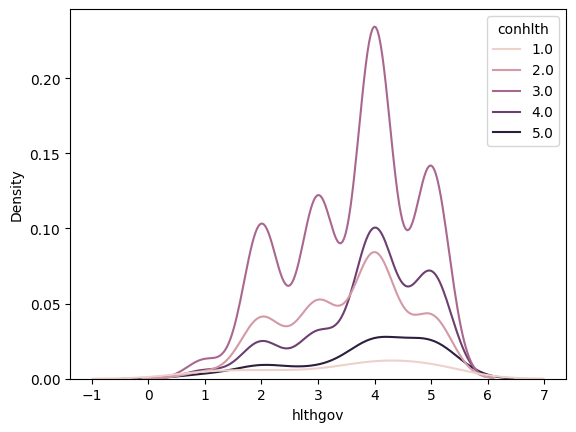

In [14]:
# display(pd.crosstab(total_df['conhlth'], total_df['hlthgov']), '\n')
# display(pd.crosstab(total_df['conhlth'], total_df['hlthgov'], normalize='all'), '\n')
# display(total_df.loc[:,['conhlth', 'hlthgov']].groupby('conhlth').describe())
# sns.kdeplot(data=total_df, x='conhlth', hue='hlthgov')
display(pd.crosstab(total_df['hlthgov'], total_df['conhlth']), '\n')
display(pd.crosstab(total_df['hlthgov'], total_df['conhlth'], normalize='all'), '\n')
display(total_df.loc[:,['hlthgov', 'conhlth']].groupby('hlthgov').describe())
sns.kdeplot(data=total_df, x='hlthgov', hue='conhlth')
# more confident agree with less gov provision, less confident agree with more gov provision

conhlth,1.0,2.0,3.0,4.0,5.0
hlthtax,,,,,
1,6,17,55,48,17
2,14,74,151,64,20
3,8,40,118,32,6
4,6,36,71,23,6
5,9,34,86,39,28


'\n'

conhlth,1.0,2.0,3.0,4.0,5.0
hlthtax,,,,,
1,0.005952,0.016865,0.054563,0.047619,0.016865
2,0.013889,0.073413,0.149802,0.063492,0.019841
3,0.007937,0.039683,0.117063,0.031746,0.005952
4,0.005952,0.035714,0.070437,0.022817,0.005952
5,0.008929,0.033730,0.085317,0.038690,0.027778


'\n'

conhlth                                             
          count      mean       std  min  25%  50%  75%  max
hlthtax                                                     
1         143.0  3.370629  0.983514  1.0  3.0  3.0  4.0  5.0
2         323.0  3.006192  0.922439  1.0  2.0  3.0  4.0  5.0
3         204.0  2.941176  0.791874  1.0  3.0  3.0  3.0  5.0
4         142.0  2.908451  0.866270  1.0  2.0  3.0  3.0  5.0
5         196.0  3.219388  1.041612  1.0  3.0  3.0  4.0  5.0

<Axes: xlabel='hlthtax', ylabel='Density'>

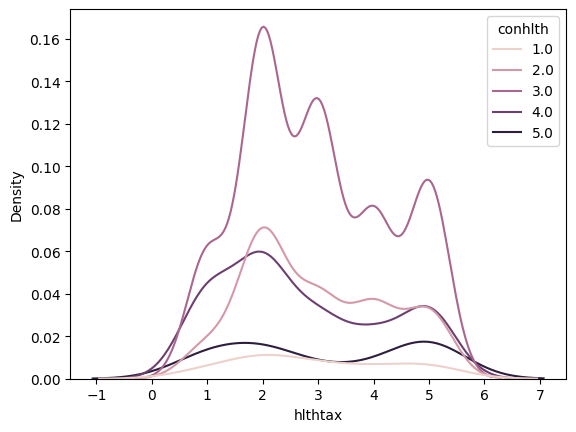

In [15]:
# display(pd.crosstab(total_df['conhlth'], total_df['hlthtax']), '\n')
# display(pd.crosstab(total_df['conhlth'], total_df['hlthtax'], normalize='all'), '\n')
# display(total_df.loc[:,['conhlth', 'hlthtax']].groupby('conhlth').describe())
# sns.kdeplot(data=total_df, x='conhlth', hue='hlthtax')
display(pd.crosstab(total_df['hlthtax'], total_df['conhlth']), '\n')
display(pd.crosstab(total_df['hlthtax'], total_df['conhlth'], normalize='all'), '\n')
display(total_df.loc[:,['hlthtax', 'conhlth']].groupby('hlthtax').describe())
sns.kdeplot(data=total_df, x='hlthtax', hue='conhlth')
# more confident more willing to tax, less confident less willing to tax

hlthsat,1,2,3,4,5,6,7
hlthinf,,,,,,,
1,3,10,41,23,71,54,30
2,10,36,157,66,78,24,10
3,6,43,109,43,14,2,2
4,15,42,65,14,7,1,2
5,4,7,9,3,3,2,2


'\n'

hlthsat,1,2,3,4,5,6,7
hlthinf,,,,,,,
1,0.002976,0.009921,0.040675,0.022817,0.070437,0.053571,0.029762
2,0.009921,0.035714,0.155754,0.065476,0.077381,0.023810,0.009921
3,0.005952,0.042659,0.108135,0.042659,0.013889,0.001984,0.001984
4,0.014881,0.041667,0.064484,0.013889,0.006944,0.000992,0.001984
5,0.003968,0.006944,0.008929,0.002976,0.002976,0.001984,0.001984


'\n'

hlthsat                                             
          count      mean       std  min  25%  50%  75%  max
hlthinf                                                     
1         232.0  4.857759  1.462824  1.0  4.0  5.0  6.0  7.0
2         381.0  3.729659  1.284682  1.0  3.0  3.0  5.0  7.0
3         219.0  3.136986  0.985888  1.0  3.0  3.0  4.0  7.0
4         146.0  2.773973  1.106536  1.0  2.0  3.0  3.0  7.0
5          30.0  3.266667  1.720732  1.0  2.0  3.0  4.0  7.0

<Axes: xlabel='hlthinf', ylabel='Density'>

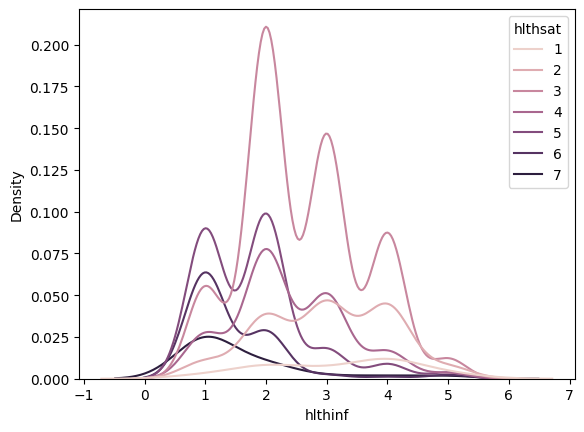

In [16]:
# display(pd.crosstab(total_df['hlthsat'], total_df['hlthinf']), '\n')
# display(pd.crosstab(total_df['hlthsat'], total_df['hlthinf'], normalize='all'), '\n')
# display(total_df.loc[:,['hlthsat', 'hlthinf']].groupby('hlthsat').describe())
# sns.kdeplot(data=total_df, x='hlthsat', hue='hlthinf')
display(pd.crosstab(total_df['hlthinf'], total_df['hlthsat']), '\n')
display(pd.crosstab(total_df['hlthinf'], total_df['hlthsat'], normalize='all'), '\n')
display(total_df.loc[:,['hlthinf', 'hlthsat']].groupby('hlthinf').describe())
sns.kdeplot(data=total_df, x='hlthinf', hue='hlthsat')
# more satisfied thinks more efficient, less satisfied thinks more inefficient

hlthsat,1,2,3,4,5,6,7
hlthgov,,,,,,,
1,1,4,8,7,6,1,1
2,8,30,65,24,21,6,2
3,10,24,67,38,31,5,5
4,14,47,155,53,72,34,17
5,5,33,86,27,43,37,21


'\n'

hlthsat,1,2,3,4,5,6,7
hlthgov,,,,,,,
1,0.000992,0.003968,0.007937,0.006944,0.005952,0.000992,0.000992
2,0.007937,0.029762,0.064484,0.023810,0.020833,0.005952,0.001984
3,0.009921,0.023810,0.066468,0.037698,0.030754,0.004960,0.004960
4,0.013889,0.046627,0.153770,0.052579,0.071429,0.033730,0.016865
5,0.004960,0.032738,0.085317,0.026786,0.042659,0.036706,0.020833


'\n'

hlthsat                                             
          count      mean       std  min  25%  50%  75%  max
hlthgov                                                     
1          28.0  3.714286  1.356934  1.0  3.0  4.0  5.0  7.0
2         156.0  3.294872  1.250641  1.0  3.0  3.0  4.0  7.0
3         180.0  3.505556  1.305327  1.0  3.0  3.0  4.0  7.0
4         392.0  3.744898  1.434405  1.0  3.0  3.0  5.0  7.0
5         252.0  4.051587  1.599713  1.0  3.0  4.0  5.0  7.0

<Axes: xlabel='hlthgov', ylabel='Density'>

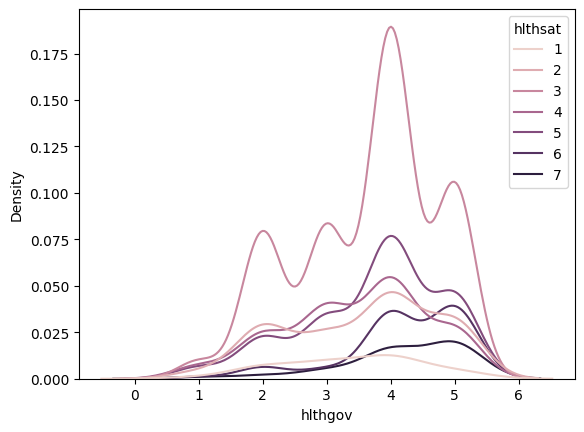

In [17]:
# display(pd.crosstab(total_df['hlthsat'], total_df['hlthgov']), '\n')
# display(pd.crosstab(total_df['hlthsat'], total_df['hlthgov'], normalize='all'), '\n')
# display(total_df.loc[:,['hlthsat', 'hlthgov']].groupby('hlthsat').describe())
# sns.kdeplot(data=total_df, x='hlthsat', hue='hlthgov')
display(pd.crosstab(total_df['hlthgov'], total_df['hlthsat']), '\n')
display(pd.crosstab(total_df['hlthgov'], total_df['hlthsat'], normalize='all'), '\n')
display(total_df.loc[:,['hlthgov', 'hlthsat']].groupby('hlthgov').describe())
sns.kdeplot(data=total_df, x='hlthgov', hue='hlthsat')
# more satisfied agree with less gov provision, less satisfied agree with more gov provision

hlthsat,1,2,3,4,5,6,7
hlthtax,,,,,,,
1,6,13,33,13,33,26,19
2,9,50,141,36,53,27,7
3,9,26,72,52,31,10,4
4,5,25,73,13,19,3,4
5,9,24,62,35,37,17,12


'\n'

hlthsat,1,2,3,4,5,6,7
hlthtax,,,,,,,
1,0.005952,0.012897,0.032738,0.012897,0.032738,0.025794,0.018849
2,0.008929,0.049603,0.139881,0.035714,0.052579,0.026786,0.006944
3,0.008929,0.025794,0.071429,0.051587,0.030754,0.009921,0.003968
4,0.004960,0.024802,0.072421,0.012897,0.018849,0.002976,0.003968
5,0.008929,0.023810,0.061508,0.034722,0.036706,0.016865,0.011905


'\n'

hlthsat                                             
          count      mean       std  min  25%  50%  75%  max
hlthtax                                                     
1         143.0  4.454545  1.714591  1.0  3.0  5.0  6.0  7.0
2         323.0  3.566563  1.348243  1.0  3.0  3.0  5.0  7.0
3         204.0  3.568627  1.267322  1.0  3.0  3.0  4.0  7.0
4         142.0  3.288732  1.229547  1.0  3.0  3.0  4.0  7.0
5         196.0  3.846939  1.514728  1.0  3.0  4.0  5.0  7.0

<Axes: xlabel='hlthtax', ylabel='Density'>

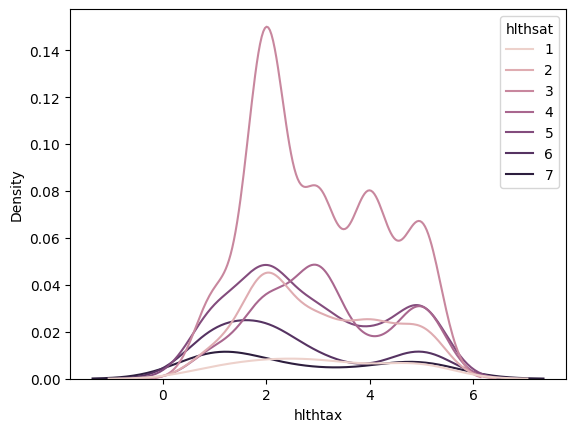

In [18]:
# display(pd.crosstab(total_df['hlthsat'], total_df['hlthtax']), '\n')
# display(pd.crosstab(total_df['hlthsat'], total_df['hlthtax'], normalize='all'), '\n')
# display(total_df.loc[:,['hlthsat', 'hlthtax']].groupby('hlthsat').describe())
# sns.kdeplot(data=total_df, x='hlthsat', hue='hlthtax')
display(pd.crosstab(total_df['hlthtax'], total_df['hlthsat']), '\n')
display(pd.crosstab(total_df['hlthtax'], total_df['hlthsat'], normalize='all'), '\n')
display(total_df.loc[:,['hlthtax', 'hlthsat']].groupby('hlthtax').describe())
sns.kdeplot(data=total_df, x='hlthtax', hue='hlthsat')
# more satisfied less willing to tax, less satisfied more willing to tax

hlthsat,1,2,3,4,5,6,7
conhlth,,,,,,,
1.0,13,11,6,6,3,3,1
2.0,16,65,91,16,11,2,0
3.0,8,51,245,90,73,12,2
4.0,1,9,33,27,73,46,17
5.0,0,2,6,10,13,20,26


'\n'

hlthsat,1,2,3,4,5,6,7
conhlth,,,,,,,
1.0,0.012897,0.010913,0.005952,0.005952,0.002976,0.002976,0.000992
2.0,0.015873,0.064484,0.090278,0.015873,0.010913,0.001984,0.000000
3.0,0.007937,0.050595,0.243056,0.089286,0.072421,0.011905,0.001984
4.0,0.000992,0.008929,0.032738,0.026786,0.072421,0.045635,0.016865
5.0,0.000000,0.001984,0.005952,0.009921,0.012897,0.019841,0.025794


'\n'

hlthsat                                             
          count      mean       std  min  25%  50%  75%  max
conhlth                                                     
1.0        43.0  2.720930  1.694888  1.0  1.0  2.0  4.0  7.0
2.0       201.0  2.736318  0.982407  1.0  2.0  3.0  3.0  6.0
3.0       481.0  3.442827  1.031461  1.0  3.0  3.0  4.0  7.0
4.0       206.0  4.786408  1.326286  1.0  4.0  5.0  6.0  7.0
5.0        77.0  5.571429  1.408887  2.0  5.0  6.0  7.0  7.0

<Axes: xlabel='conhlth', ylabel='Density'>

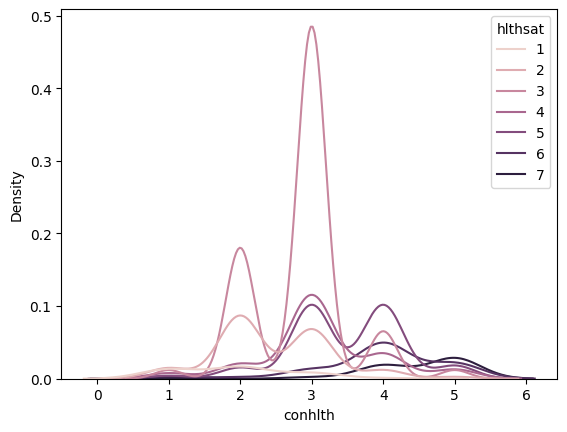

In [19]:
# display(pd.crosstab(total_df['hlthsat'], total_df['conhlth']), '\n')
# display(pd.crosstab(total_df['hlthsat'], total_df['conhlth'], normalize='all'), '\n')
# display(total_df.loc[:,['hlthsat', 'conhlth']].groupby('hlthsat').describe())
# sns.kdeplot(data=total_df, x='hlthsat', hue='conhlth')
display(pd.crosstab(total_df['conhlth'], total_df['hlthsat']), '\n')
display(pd.crosstab(total_df['conhlth'], total_df['hlthsat'], normalize='all'), '\n')
display(total_df.loc[:,['conhlth', 'hlthsat']].groupby('conhlth').describe())
sns.kdeplot(data=total_df, x='conhlth', hue='hlthsat')
# positive correlation between confidence and satisfaction (more confident means more satisfied)